In [3]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import Sbopen
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Poland vs Argentina
MATCH_ID = 3857264
events = sb.events(match_id = MATCH_ID)

Get data

In [5]:
df = events[events.type == 'Shot']
df = df[['period', 'minute', 'shot_statsbomb_xg', 'team', 'player', 'shot_outcome', 'shot_type']]
df.rename(columns = {'shot_statsbomb_xg':'xG', 'shot_outcome':'result'}, inplace = True)
df.sort_values(by='team', inplace=True)
df

,period,minute,xG,team,player,result,shot_type
3935,1,42,0.315272,Argentina,Rodrigo Javier De Paul,Saved,Open Play
3947,2,72,0.181460,Argentina,Julián Álvarez,Off T,Open Play
3946,2,70,0.132323,Argentina,Lionel Andrés Messi Cuccittini,Saved,Open Play
3945,2,66,0.100542,Argentina,Julián Álvarez,Goal,Open Play
3944,2,63,0.023948,Argentina,Lionel Andrés Messi Cuccittini,Blocked,Open Play
3943,2,60,0.130100,Argentina,Alexis Mac Allister,Saved,Open Play
3942,2,55,0.152008,Argentina,Julián Álvarez,Blocked,Open Play
3941,2,55,0.058334,Argentina,Lionel Andrés Messi Cuccittini,Wayward,Open Play
3940,2,52,0.061194,Argentina,Lionel Andrés Messi Cuccittini,Wayward,Open Play
3937,2,45,0.107546,Argentina,Alexis Mac Allister,Goal,Open Play


Get team names

In [6]:
home_team = df['team'].iloc[0]
away_team = df['team'].iloc[-1]
print('Home Team : ' + home_team)
print('Away Team : ' + away_team)

Home Team : Argentina
Away Team : Poland


Add element for better chart

In [7]:
new_row_home = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':home_team,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

new_row_away = {'period':1, 
           'minute':0, 
           'xG':0.000001, 
           'team':away_team,
           'player':'', 
           'result':'',
           'shot_type':'Open Play'
           }

df = df.append(new_row_home, ignore_index=True)
df = df.append(new_row_away, ignore_index=True)

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/2472934798.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_home, ignore_index=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/2472934798.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_away, ignore_index=True)


Cumulative Sum xG

In [8]:
home_df = df[df['team'] == home_team]
home_df.sort_values(by='minute', inplace=True)
home_df['h_cum'] = home_df['xG'].cumsum()

away_df = df[df['team'] == away_team]
away_df.sort_values(by='minute', inplace=True)
away_df['a_cum'] = away_df['xG'].cumsum()

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/3182853901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df.sort_values(by='minute', inplace=True)
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/3182853901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['h_cum'] = home_df['xG'].cumsum()
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/3182853901.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [9]:
home_goal = home_df[home_df['result'].str.contains("Goal")]
home_goal["scorechart"] = home_goal["minute"].astype(str) + "'" + " " +home_goal["player"] + " (" + home_goal["shot_type"] + ")"

away_goal = away_df[away_df['result'].str.contains("Goal")]
away_goal["scorechart"] = away_goal["minute"].astype(str) + "'" + " " +away_goal["player"] + " (" + away_goal["shot_type"] + ")"

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/2558652882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_goal["scorechart"] = home_goal["minute"].astype(str) + "'" + " " +home_goal["player"] + " (" + home_goal["shot_type"] + ")"


Total xG 

In [10]:
home_total_xG = round(home_df['xG'].sum(),2).astype(str)
away_total_xG = round(away_df['xG'].sum(),2).astype(str)

Number od goals

In [11]:
h_total_goals = str(len(home_goal))
a_total_goals = str(len(away_goal))

Create chart

/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/229911404.py:13: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, txt in home_goal['scorechart'].iteritems():
/var/folders/_h/ljwht4gd7lb99rm1hm78h7_00000gn/T/ipykernel_49065/229911404.py:23: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, txt in away_goal['scorechart'].iteritems():


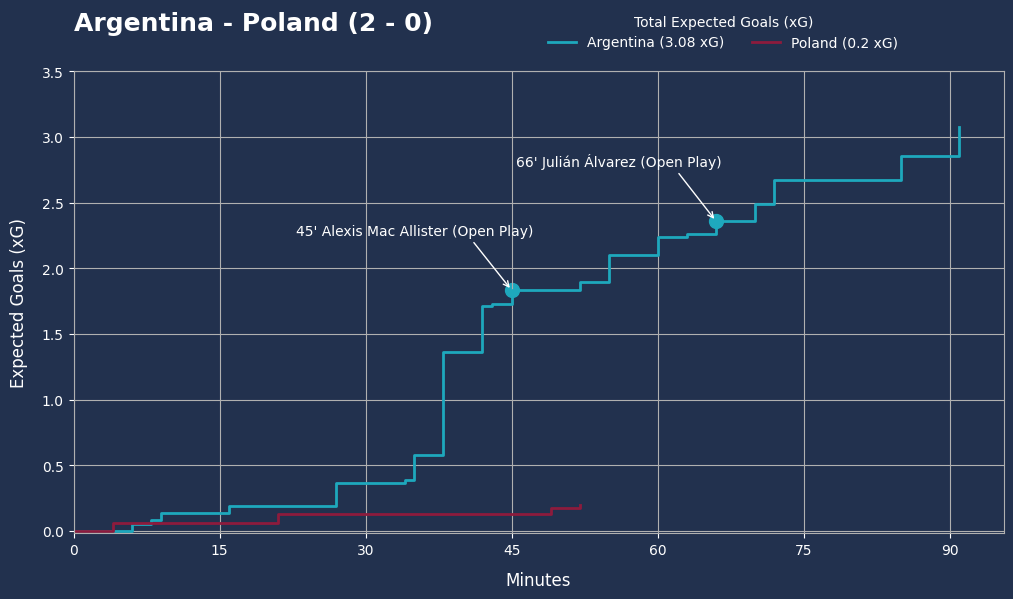

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

# Create line plots
ax.step(x = home_df['minute'], y = home_df['h_cum'], where = 'post', color ='#1EA8BD', label= home_team + " (" + home_total_xG + " xG)"  ,linewidth=2)  
ax.step(x = away_df['minute'], y = away_df['a_cum'], where = 'post', color = '#8D1B3D', label= away_team + " (" + away_total_xG + " xG)" ,linewidth=2)

# Create scatter plot for highlighting the goal
ax.scatter(x= home_goal['minute'], y = home_goal['h_cum'] , marker= 'o', s= 100 ,color = '#1EA8BD')
ax.scatter(x= away_goal['minute'], y = away_goal['a_cum'] , marker= 'o', s =100, color = '#8D1B3D')


# Customize our chart
for j, txt in home_goal['scorechart'].iteritems():
    ax.annotate(txt, 
                (home_goal['minute'][j], home_goal['h_cum'][j]),
                xycoords='data',
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white'))

for i, txt in away_goal['scorechart'].iteritems():
    ax.annotate(
                txt, 
                (away_goal['minute'][i], away_goal['a_cum'][i]),
                xycoords='data', 
                ha='center',
                xytext=(-70, 40), 
                textcoords='offset points', 
                color='white',
                arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,armA=50,rad=10", color = 'white')
                )




# Axis
plt.xticks([0,15,30,45,60,75,90])
plt.yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
plt.xlim(0)
plt.ylim(-0.02)
plt.grid()
# color for axis
ax.spines['top'].set_color('#B0B0B0')
ax.spines['bottom'].set_color('#B0B0B0')
ax.spines['right'].set_color('#B0B0B0')
ax.spines['left'].set_color('#B0B0B0')

ax.tick_params(axis='x', colors='white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')

# title
ax.set_title(home_team + " - " + away_team + " (" + h_total_goals + " - " + a_total_goals + ")",fontsize=18,fontweight="bold", color = "white", pad=30, loc="left")

# legend
legend = ax.legend(title = 'Total Expected Goals (xG)' ,loc='best', shadow=False, frameon=False, ncol=2,  labelcolor='white', bbox_to_anchor=(0.9, 1.15))
title = legend.get_title()
title.set_color("white")

# background colors
ax.set_facecolor("#22314E")
fig.patch.set_facecolor('#22314E')


plt.ylabel("Expected Goals (xG)", fontsize = 12, labelpad = 10)
plt.xlabel("Minutes", fontsize = 12, labelpad = 10)


plt.savefig('Images/xGChart_World_Cup.png')

Code from: [Python for Sports Data Science: How to Create an Expected Goals Chart](https://medium.com/@yogakrisanto1129/python-for-sports-data-science-how-to-create-an-expected-goals-chart-3157168a453a)